# Observable Trends

The data below analyzes the relationships between city latitudes and multiple factors including wind speed, humidity, max temperature, and cloudiness. 

1. There is a negative trend between maximum temperature and increasing latitude. The inverse is true for maximum temperature and decreasing latitude. This is an obvious trend as the farther away from the equator we go, the temperature continues to decrease and vice versa. 

2. Based on the data below, it appears that humidity percentage in the northern and southern hemisphere have little to no correlation. There are significantly less cities analyzed in the southern hemisphere within this dataset which could impact the overall results. 

3. Similarly, there appears to be no trend between the cloudiness and relationship between city latitude in both the northern and southern hemispheres. 

In [5]:
# Dependencies and Setup
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [7]:
# cities=cities[:5]

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
query_url= base_url +  api_key + "&q=" + city
print(query_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9535eb11d60ce28ef59e939de006a6c9&q=rikitea


In [9]:
# Create a base URL

# base_url="http://api.openweathermap.org/data/2.5/weather?"

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

#Create a counter for records retreival
record=1

#create a dataframe for cities


city_weather= pd.DataFrame({"City": cities})

#Create empty lists to append values of lat, lon, max temp, humidity, cloud coverage, wind speed, country, datetime

city_weather["Lat"]= ""
city_weather["Lng"]= ""
city_weather["Max Temp"]= ""
city_weather["Humidity"]=""
city_weather["Cloudiness"]= ""
city_weather["Wind Speed"]= ""
city_weather["Country"]= ""
city_weather["Date"]= ""


#Print beginning of loop 
print("Begin Data Retrieval")
print("-------------------------")



#loop through cities_pd and add rows

for index, row in city_weather.iterrows():
    
    city=row["City"]
    
    query_url= base_url + api_key + "&q=" + city
    weather_response=requests.get(query_url).json()
     
                                        
    try:
        print(f"Processing Record {record} | {city} ")
                                        
        city_weather.loc[index, "Lat"]=weather_response["coord"]["lat"]
        city_weather.loc[index, "Lng"]=weather_response["coord"]["lon"]
        city_weather.loc[index, "Max Temp"]=weather_response["main"]["temp_max"]
        city_weather.loc[index, "Humidity"]=weather_response["main"]["humidity"]
        city_weather.loc[index, "Cloudiness"]=weather_response["clouds"]["all"]
        city_weather.loc[index, "Wind Speed"]=weather_response["wind"]["speed"]
        city_weather.loc[index, "Country"]=weather_response["sys"]["country"]
        city_weather.loc[index, "Date"]=weather_response["dt"]
       

    except:
        
        print("City not found. Skipping...")
        
        
    
    record=record +1       


print("----------------------")
print("Data Retrival Complete")
print("----------------------")

Begin Data Retrieval
-------------------------
Processing Record 1 | doka 
Processing Record 2 | kapaa 
Processing Record 3 | madimba 
Processing Record 4 | lorengau 
Processing Record 5 | khatanga 
Processing Record 6 | upernavik 
Processing Record 7 | klaksvik 
Processing Record 8 | tsihombe 
City not found. Skipping...
Processing Record 9 | victoria 
Processing Record 10 | kandi 
Processing Record 11 | albany 
Processing Record 12 | jamestown 
Processing Record 13 | georgetown 
Processing Record 14 | jasper 
Processing Record 15 | bafq 
Processing Record 16 | ptichye 
Processing Record 17 | clyde river 
Processing Record 18 | hermanus 
Processing Record 19 | jalu 
Processing Record 20 | pilar 
Processing Record 21 | hobart 
Processing Record 22 | esperance 
Processing Record 23 | sola 
Processing Record 24 | skibbereen 
Processing Record 25 | busselton 
Processing Record 26 | bluff 
Processing Record 27 | sorland 
Processing Record 28 | safranbolu 
Processing Record 29 | palmer 
Pro

Processing Record 228 | armacao dos buzios 
City not found. Skipping...
Processing Record 229 | jinsha 
Processing Record 230 | vila velha 
Processing Record 231 | usta muhammad 
Processing Record 232 | smithers 
Processing Record 233 | anadyr 
Processing Record 234 | horsham 
Processing Record 235 | baoro 
Processing Record 236 | harer 
Processing Record 237 | caravelas 
Processing Record 238 | chagda 
City not found. Skipping...
Processing Record 239 | berdsk 
Processing Record 240 | bambous virieux 
Processing Record 241 | laguna 
Processing Record 242 | lebu 
Processing Record 243 | laramie 
Processing Record 244 | kloulklubed 
Processing Record 245 | tabiauea 
City not found. Skipping...
Processing Record 246 | charyshskoye 
Processing Record 247 | taloqan 
Processing Record 248 | zhuhai 
Processing Record 249 | alyangula 
Processing Record 250 | sawakin 
Processing Record 251 | kavieng 
Processing Record 252 | nizhneyansk 
City not found. Skipping...
Processing Record 253 | honia

Processing Record 448 | honningsvag 
Processing Record 449 | palmerston 
Processing Record 450 | dafeng 
Processing Record 451 | calama 
Processing Record 452 | kos 
Processing Record 453 | mogadishu 
Processing Record 454 | urumqi 
Processing Record 455 | touros 
Processing Record 456 | sharan 
Processing Record 457 | vardo 
Processing Record 458 | lavumisa 
Processing Record 459 | boende 
Processing Record 460 | pangai 
Processing Record 461 | saint andrews 
Processing Record 462 | karasburg 
Processing Record 463 | bontang 
Processing Record 464 | luderitz 
Processing Record 465 | tucuman 
Processing Record 466 | trujillo 
Processing Record 467 | bolshoy tsaryn 
City not found. Skipping...
Processing Record 468 | coquimbo 
Processing Record 469 | muravlenko 
Processing Record 470 | neuquen 
Processing Record 471 | wahran 
City not found. Skipping...
Processing Record 472 | port blair 
Processing Record 473 | dawson creek 
Processing Record 474 | tobe 
Processing Record 475 | patiya 

In [10]:
weather_response

{'coord': {'lon': -135.33, 'lat': 57.0531},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 39.09,
  'feels_like': 36.82,
  'temp_min': 39.09,
  'temp_max': 39.09,
  'pressure': 1007,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 340},
 'clouds': {'all': 40},
 'dt': 1666714135,
 'sys': {'type': 1,
  'id': 7795,
  'country': 'US',
  'sunrise': 1666713398,
  'sunset': 1666748030},
 'timezone': -28800,
 'id': 5557293,
 'name': 'Sitka',
 'cod': 200}

In [14]:
temp=weather_response["dt"]
time=dt.datetime.fromtimestamp(temp)

time.strftime('%Y-%m-%d %H:%M:%S')


'2022-10-25 12:08:55'

In [21]:
time.strftime("%x")


'10/25/22'

# Convert Raw Data to DataFrame

In [22]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,doka,13.5167,35.7667,84.69,43.0,28.0,5.91,SD,1666713871
1,kapaa,22.0752,-159.3190,79.12,87.0,75.0,12.66,US,1666713871
2,madimba,-10.4000,40.3333,74.23,83.0,2.0,7.70,TZ,1666713872
3,lorengau,-2.0226,147.2712,81.57,72.0,100.0,3.18,PG,1666713873
4,khatanga,71.9667,102.5000,8.69,96.0,89.0,8.14,RU,1666713593


In [24]:
# city_weather.to_csv("weather_csv", index=False, header=True)

In [25]:
city_weather["Lat"]=pd.to_numeric(city_weather["Lat"], errors='coerce')
city_weather["Lng"]=pd.to_numeric(city_weather["Lng"], errors='coerce')
city_weather["Max Temp"]=pd.to_numeric(city_weather["Max Temp"], errors='coerce')
city_weather["Humidity"]=pd.to_numeric(city_weather["Humidity"], errors='coerce')
city_weather["Cloudiness"]=pd.to_numeric(city_weather["Cloudiness"], errors='coerce')
city_weather["Wind Speed"]=pd.to_numeric(city_weather["Wind Speed"], errors='coerce')

city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,doka,13.5167,35.7667,84.69,43.0,28.0,5.91,SD,1666713871
1,kapaa,22.0752,-159.3190,79.12,87.0,75.0,12.66,US,1666713871
2,madimba,-10.4000,40.3333,74.23,83.0,2.0,7.70,TZ,1666713872
3,lorengau,-2.0226,147.2712,81.57,72.0,100.0,3.18,PG,1666713873
4,khatanga,71.9667,102.5000,8.69,96.0,89.0,8.14,RU,1666713593
...,...,...,...,...,...,...,...,...,...
595,agadir,30.4202,-9.5982,99.05,28.0,91.0,3.31,MA,1666714134
596,zhanatas,NaN,NaN,NaN,NaN,NaN,NaN,,
597,nguiu,NaN,NaN,NaN,NaN,NaN,NaN,,
598,tumannyy,NaN,NaN,NaN,NaN,NaN,NaN,,


In [26]:
city_weather.to_csv("weather_csv", index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%.

In [27]:
humidity_100=city_weather[(city_weather["Humidity"] >100)].index
humidity_100

Int64Index([], dtype='int64')

After inspecting the data, no cities were found to have a humidity>100%

# Plotting the Data

# Latitude vs. Temperature Plot

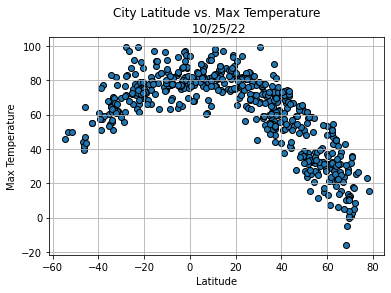

In [59]:
#Temperature Vs. Latitude
x_lat=city_weather["Lat"]
y_temp=city_weather["Max Temp"]
plt.scatter(x_lat, y_temp, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs. Max Temperature\n {time.strftime('%x')}")
plt.grid()
plt.savefig("./Images/lat_temp_scatter")
plt.show()

The scatter plot above visualizes the relationship between city latitudes and max temperature in Farenheight. The relationship between the two appears to create a normal distribution. 

# Latitude vs. Humidity Plot

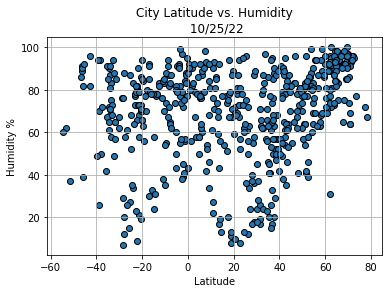

In [58]:
x_lat=city_weather["Lat"]
y_hum=city_weather["Humidity"]
plt.scatter(x_lat, y_hum, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity\n {time.strftime('%x')}")
plt.grid()
plt.savefig("./Images/lat_humidity_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and humidity. The majority of cities analyzed appear to have a humidity percent greater than 60. 

# Latitude vs. Cloudiness Plot

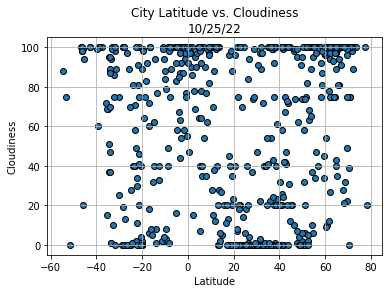

In [57]:
x_lat=city_weather["Lat"]
y_cloud=city_weather["Cloudiness"]
plt.scatter(x_lat, y_cloud, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness\n{time.strftime('%x')}")
plt.grid()
plt.savefig("./Images/lat_cloud_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and cloudiness. There appears to be no correlation between the two variables.

# Latitude vs. Wind Speed Plot

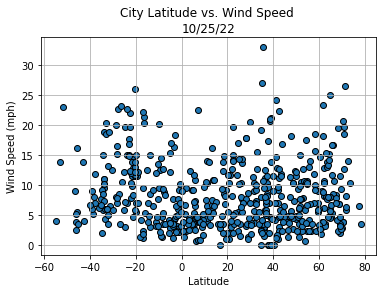

In [60]:
x_lat=city_weather["Lat"]
y_wind=city_weather["Wind Speed"]
plt.scatter(x_lat, y_wind, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed \n{time.strftime('%x')}")
plt.grid()
plt.savefig("./Images/lat_wind_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and wind speed. The majority of cities analyzed have a wind speed less than 15 mph.

# Linear Regression

In [38]:
northern_weather=city_weather.loc[city_weather["Lat"]>=0]
northern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,doka,13.5167,35.7667,84.69,43.0,28.0,5.91,SD,1666713871
1,kapaa,22.0752,-159.3190,79.12,87.0,75.0,12.66,US,1666713871
4,khatanga,71.9667,102.5000,8.69,96.0,89.0,8.14,RU,1666713593
5,upernavik,72.7868,-56.1549,25.20,95.0,100.0,13.91,GL,1666713874
6,klaksvik,62.2266,-6.5890,50.92,91.0,94.0,12.73,FO,1666713877
...,...,...,...,...,...,...,...,...,...
588,kangaatsiaq,68.3065,-53.4641,30.70,75.0,100.0,19.48,GL,1666714132
591,llanes,43.4198,-4.7549,73.89,61.0,73.0,8.08,ES,1666714133
594,umm lajj,25.0213,37.2685,80.76,64.0,6.0,10.22,SA,1666713858
595,agadir,30.4202,-9.5982,99.05,28.0,91.0,3.31,MA,1666714134


In [39]:
southern_weather=city_weather.loc[city_weather["Lat"]<=0]
southern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,madimba,-10.4000,40.3333,74.23,83.0,2.0,7.70,TZ,1666713872
3,lorengau,-2.0226,147.2712,81.57,72.0,100.0,3.18,PG,1666713873
17,hermanus,-34.4187,19.2345,65.80,72.0,37.0,5.84,ZA,1666713586
19,pilar,-9.5972,-35.9567,84.13,55.0,79.0,12.48,BR,1666713881
20,hobart,-42.8794,147.3294,55.26,96.0,100.0,13.80,AU,1666713624
...,...,...,...,...,...,...,...,...,...
586,samarai,-10.6167,150.6667,79.90,70.0,94.0,4.63,PG,1666714131
589,mildura,-34.2000,142.1500,57.07,91.0,70.0,8.43,AU,1666714132
590,khorixas,-20.3667,14.9667,86.94,19.0,4.0,26.04,NA,1666714133
592,itarema,-2.9248,-39.9167,87.48,57.0,54.0,18.28,BR,1666714084


# Northern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7375002269183096


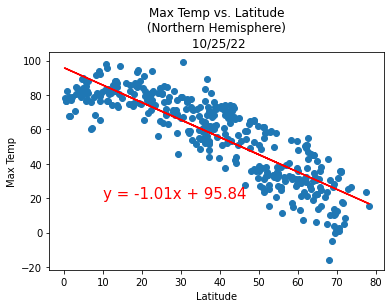

In [41]:

x_value=northern_weather["Lat"]
y_ntemp=northern_weather["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_ntemp)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_ntemp)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Max Temp vs. Latitude\n (Northern Hemisphere) \n {time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/temp_lat_north_regression")
plt.show()

The linear regression model above indicates that max temperatutre and latitude are highly dependent on each other. As evidenced by the r-squared value. This graph would be a useful predictive model. As the latitude increases, the temperature decreases in the northern hemisphere.

In [158]:
#Southern Hemisphere-Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4634903783633412


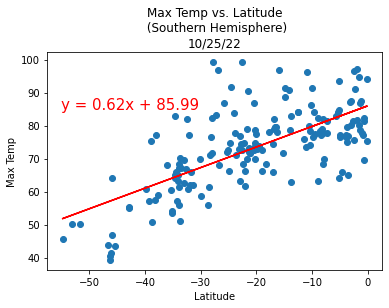

In [42]:

x_svalue=southern_weather["Lat"]
y_stemp=southern_weather["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, y_stemp)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, y_stemp)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Max Temp vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/temp_lat_south_regression")
plt.show()

The relationship between max temperature and latitude in the southern hemisphere is positive as displayed by the r-squared value. And thus, can be used as a predictive model. As the latitude decreases, the max temperature incerases. It is clear that the southern hemisphere has significantly less cities to analyze compared to the northern hemisphere. This may be the reason the r-squared value is not as strong as the northern hemisphere's. 

In [160]:
#Northern Hemisphere-Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.09653233269261056


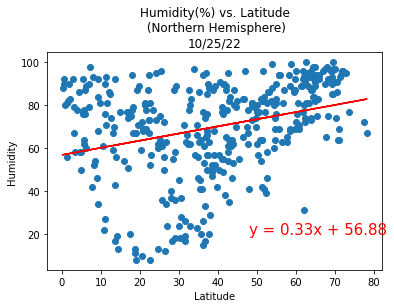

In [43]:
x_value=northern_weather["Lat"]
n_hum=northern_weather["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_hum)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_hum)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity(%) vs. Latitude\n (Northern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/humidity_lat_north_regression")
plt.show()

The scatter plot above analyzes the realtionship between humidity percentage and city latitude in the northern hemisphere. The r-squared value in this example is weak and therefore this would not be a valuable predictive model. 

In [ ]:
#Southern Hemisphere-Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.0032833689376064123


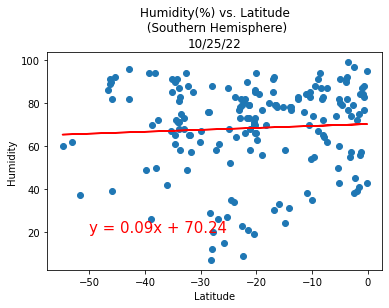

In [44]:
x_svalue=southern_weather["Lat"]
s_hum=southern_weather["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_hum)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_hum)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity(%) vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/humidity_lat__south_regression")
plt.show()

The scatter plot above analyzes the relationship between humidity percentage and city latitude in the southern hemisphere. The r-squared value itself is too low to have any predictive value between the two variables. 

In [164]:
#Northern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

The r-squared is: 0.03279305278812436


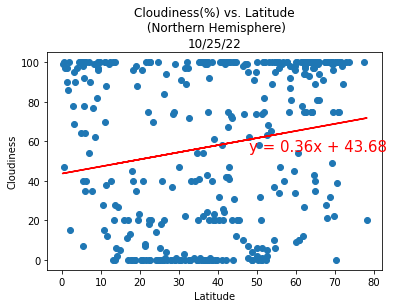

In [56]:
x_value=northern_weather["Lat"]
n_cloud=northern_weather["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_cloud)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_cloud)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(48,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness(%) vs. Latitude\n (Northern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/cloud_lat_north_regression")
plt.show()

The scatter plot above analyzes the linear regression between cloudiness and city latitude in the northern hemisphere. The variable values appear to have no dependency on each other. This would not be a useful predictive model. 

In [166]:
#Southern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

The r-squared is: 0.0036998091147158615


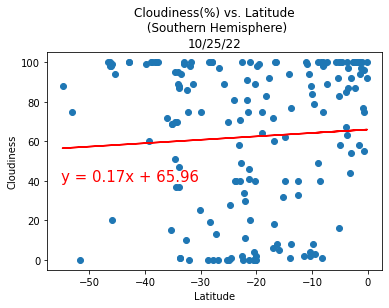

In [47]:
x_svalue=southern_weather["Lat"]
s_cloud=southern_weather["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_cloud)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_cloud)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness(%) vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/cloud_lat_south_regression")
plt.show()

The scatter plot above analyzes the relationship between cloudiness and city latitude int he southern hemisphere. We cannot predict the dependency of cloudiness to latitude due to the weak r-squared value.

In [168]:
#Northern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019949860492614595


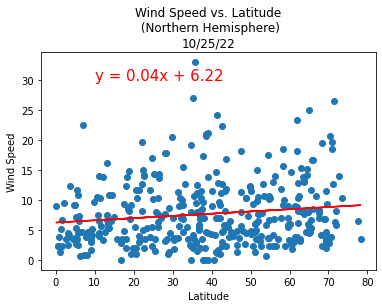

In [53]:
x_value=northern_weather["Lat"]
n_wind=northern_weather["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_wind)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_wind)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Wind Speed vs. Latitude\n (Northern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/wind_lat_north_regression")
plt.show()

The scatter plot above analyzes the relationship between city latitude and wind speed in the northern hemisphere. The r-squared value is a poor indication of the dependency of wind speed to city latitude. 

In [170]:
#Southern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.038626531967216986


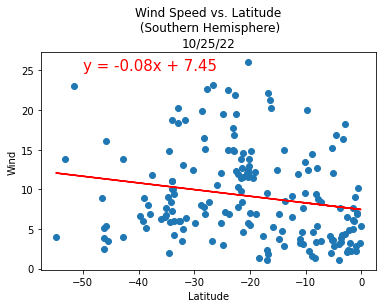

In [51]:
x_svalue=southern_weather["Lat"]
s_wind=southern_weather["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_wind)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_wind)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title(f"Wind Speed vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./Images/wind_lat_south_regression")
plt.show()

The scatter plot above analyzes relationship between wind speed and city latitude in the southern hemisphere. The linear regression model and r-squared value are again, not a useful predictive model of the relationship between increasing latitude and wind speed. 